In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv("twitter_and_google_training.csv")
display(df)

,Date,buy tesla,elon musk,model 3,model y,tsla stock,tesla earnings,car market,electric vehicles,environment,...,whistleblower,union,tesla debt,subsidy,Open,High,Low,Close,sentiment_score,Out
0,2020-11-01,4.50,1.96,48.23,30.00,1.44,0.00,22.57,19.95,31.50,...,1.68,40.80,0.00,27.69,394.000000,406.980000,392.300000,400.500000,0.305093,0
1,2020-11-02,3.90,2.94,45.58,23.60,12.96,0.00,31.45,9.45,69.75,...,1.44,68.00,0.00,42.60,394.000000,406.980011,392.299988,400.510010,0.061635,0
2,2020-11-03,7.50,1.89,47.17,22.80,11.52,1.80,11.84,14.70,66.75,...,2.40,59.16,0.00,50.41,409.730011,427.769989,406.690002,423.899994,0.180670,0
3,2020-11-04,2.85,0.91,15.37,15.60,7.56,0.36,14.43,3.50,40.50,...,1.04,34.68,0.00,39.05,430.619995,435.399994,417.100006,420.980011,0.534486,1
4,2020-11-05,4.05,1.47,30.74,19.20,10.08,0.42,6.66,21.00,51.00,...,6.08,42.16,0.00,26.27,428.299988,440.000000,424.000000,438.089996,0.279628,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,2021-11-26,20.16,4.90,62.37,55.38,10.80,0.00,18.29,15.93,12.96,...,1.26,70.55,13.35,3.60,1099.469971,1108.780029,1081.000000,1081.920044,0.821676,1
391,2021-11-27,12.24,3.92,70.84,74.10,3.00,0.00,25.96,8.85,14.40,...,0.57,57.27,0.00,14.40,1099.469971,1108.780029,1081.000000,1081.920044,0.513672,1
392,2021-11-28,7.44,3.84,44.40,37.70,2.28,0.00,15.37,16.80,35.55,...,3.00,53.20,46.55,7.00,1099.469971,1108.780029,1081.000000,1081.920044,0.819714,1
393,2021-11-29,12.96,2.88,31.80,30.74,14.82,0.00,28.09,13.44,59.25,...,3.90,88.35,0.00,33.60,1100.989990,1142.670044,1100.189941,1136.989990,0.292264,0


In [2]:
data = df.to_numpy()
x = [arr[1:20] for arr in data]
y = [arr[20] for arr in data]
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=42)
x_train = np.array(sc.fit_transform(x_train))
x_test = np.array(sc.fit_transform(x_test))

print(len(x_train), len(x_train[0]))
print(len(y_train))


355 19
355


In [3]:
print(x_train[0])

[0.2387683  0.08588649 0.3994791  0.23637441 0.63068182 0.0039
 0.20778907 0.1968209  0.52122059 0.48989691 0.0275     0.39516779
 0.         0.5        0.51998427 0.55112312 0.52751307 0.54127077
 0.21496392]


In [4]:
print(y_train[0])

0


In [5]:
training_data = np.asarray(x_train)
training_labels = np.asarray(y_train)
test_data = np.asarray(x_test)
test_labels = np.asarray(y_test)

In [11]:
import numpy as np

import tensorflow as tf
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.models import Model

from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt

def plot_loss(l, vl):
    sn.set_style("darkgrid")
    plt.plot(l)
    plt.plot(vl)
    plt.show()
def plot_acc(acc, vacc):
    sn.set_style("darkgrid")
    plt.plot(acc)
    plt.plot(vacc)
    plt.show()
    

# plot confusion matrix
import seaborn as sn
def print_confusion_matrix(array):
  df_cm = pd.DataFrame(array, range(2), range(2))
  plt.figure(figsize = (10,7))
  sn.heatmap(df_cm, annot=True)

def get_out(val):
    if val>0.5:
        return 1
    else:
        return 0

class binary_classifier(object):
    def __init__(self, input_dim, hidden_dim):
      input_layer = Input(shape=(input_dim,))
      
      hidden_layer = Dense(hidden_dim, activation='relu')(input_layer)
      second_hidden_layer = Dense(hidden_dim, activation='relu')(hidden_layer)
      output_layer = Dense(1, activation='sigmoid')(second_hidden_layer)

      self._bm = Model(input_layer, output_layer)
      self._bm.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    
    def train(self, training_data, training_labels, test_data, test_labels, batch_size, epochs):
      history = self._bm.fit(training_data, 
                                    training_labels,
                                    verbose=0,
                                    epochs = epochs,
                                    batch_size=batch_size,
                                    shuffle=True,
                                    validation_data=(
                                            test_data, 
                                            test_labels))
      accuracy = history.history['accuracy']
      loss = history.history['loss']
      val_accuracy = history.history['val_accuracy']
      val_loss = history.history['val_loss']
      return accuracy, loss, val_accuracy, val_loss
    
    def compute_confusion_matrix(self, test_data, test_labels):
        output = self._bm.predict(test_data)
        y_pred = [get_out(prediction) for prediction in output]
        #predicted_labels = np.array([item for item in y_pred])
        cm = confusion_matrix(y_pred, test_labels)
        return cm

Loss - Orange | Validation Loss - Blue


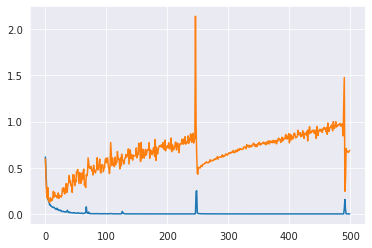

Accuracy - Orange | Validation Accuracy - Blue


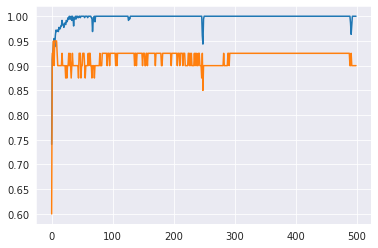

Confusion Matrix: 100 hidden neurons


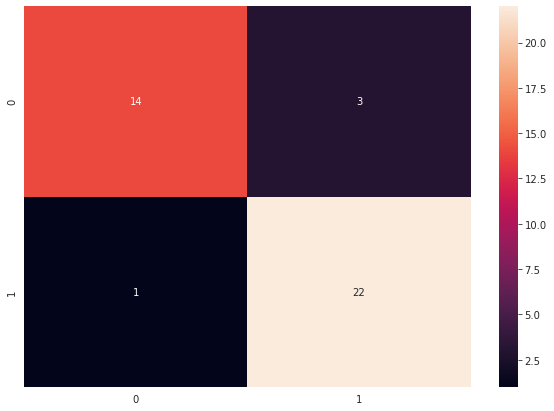

In [12]:
bc = binary_classifier(19, 100)
acc100, l100, vacc100, vl100 = bc.train(training_data, training_labels, test_data, test_labels, 10, 500)
cm100 = bc.compute_confusion_matrix(test_data, test_labels)

print("Loss - Orange | Validation Loss - Blue")
plot_loss(l100, vl100)
print("Accuracy - Orange | Validation Accuracy - Blue")
plot_acc(acc100, vacc100)
print("Confusion Matrix: 100 hidden neurons")
print_confusion_matrix(cm100)

Loss - Orange | Validation Loss - Blue


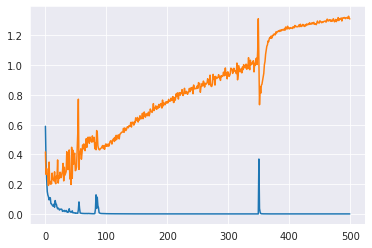

Accuracy - Orange | Validation Accuracy - Blue


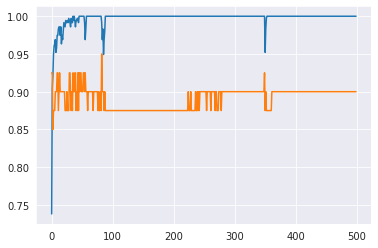

Confusion Matrix: 200 hidden neurons


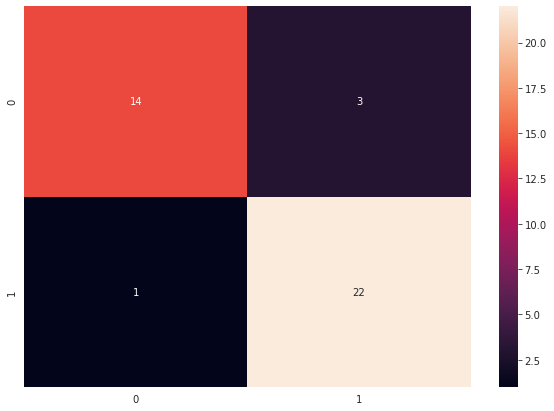

In [13]:
bc = binary_classifier(19, 200)
acc200, l200, vacc200, vl200 = bc.train(training_data, training_labels, test_data, test_labels, 10, 500)
cm200 = bc.compute_confusion_matrix(test_data, test_labels)
print("Loss - Orange | Validation Loss - Blue")
plot_loss(l200, vl200)
print("Accuracy - Orange | Validation Accuracy - Blue")
plot_acc(acc200, vacc200)
print("Confusion Matrix: 200 hidden neurons")
print_confusion_matrix(cm200)

Loss - Orange | Validation Loss - Blue


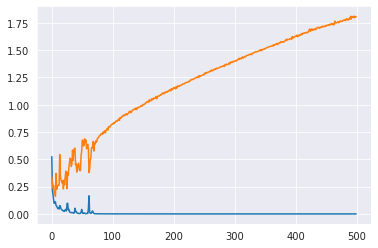

Accuracy - Orange | Validation Accuracy - Blue


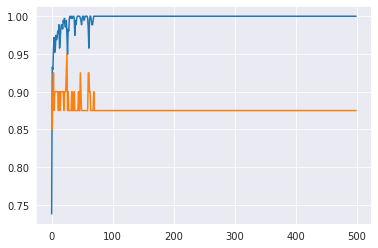

Confusion Matrix: 400 hidden neurons


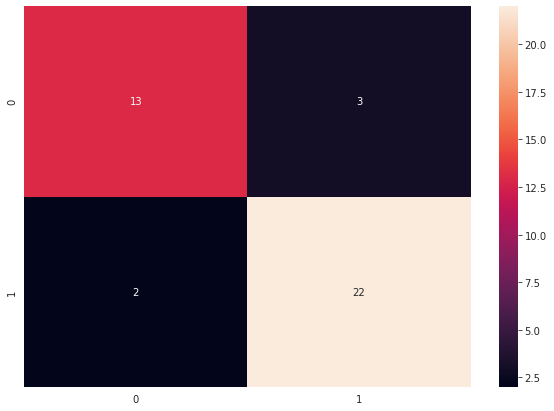

In [15]:
bc = binary_classifier(19, 400)
acc400, l400, vacc400, vl400 = bc.train(training_data, training_labels, test_data, test_labels, 10, 500)
cm400 = bc.compute_confusion_matrix(test_data, test_labels)
print("Loss - Orange | Validation Loss - Blue")
plot_loss(l400, vl400)
print("Accuracy - Orange | Validation Accuracy - Blue")
plot_acc(acc400, vacc400)
print("Confusion Matrix: 400 hidden neurons")
print_confusion_matrix(cm400)

Loss - Orange | Validation Loss - Blue


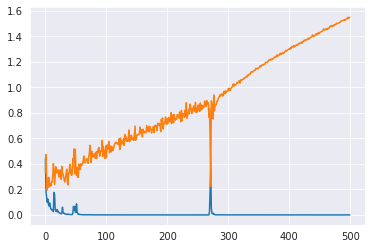

Accuracy - Orange | Validation Accuracy - Blue


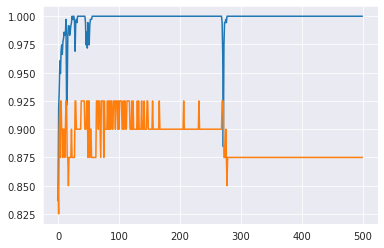

Confusion Matrix: 600 hidden neurons


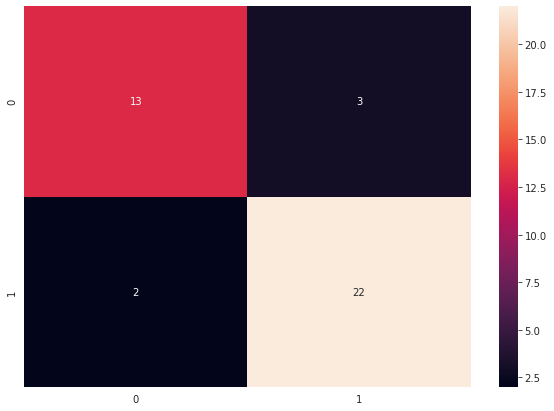

In [16]:
bc = binary_classifier(19, 600)
acc600, l600, vacc600, vl600 = bc.train(training_data, training_labels, test_data, test_labels, 10, 500)
cm600 = bc.compute_confusion_matrix(test_data, test_labels)
print("Loss - Orange | Validation Loss - Blue")
plot_loss(l600, vl600)
print("Accuracy - Orange | Validation Accuracy - Blue")
plot_acc(acc600, vacc600)
print("Confusion Matrix: 600 hidden neurons")
print_confusion_matrix(cm600)